In [4]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (12, 8)

### 1. 다음 데이터를 잘 표현하는 회귀 모델을 찾으시오.

$$y = f(x)$$

In [5]:
data = np.load('./nn_reg1.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

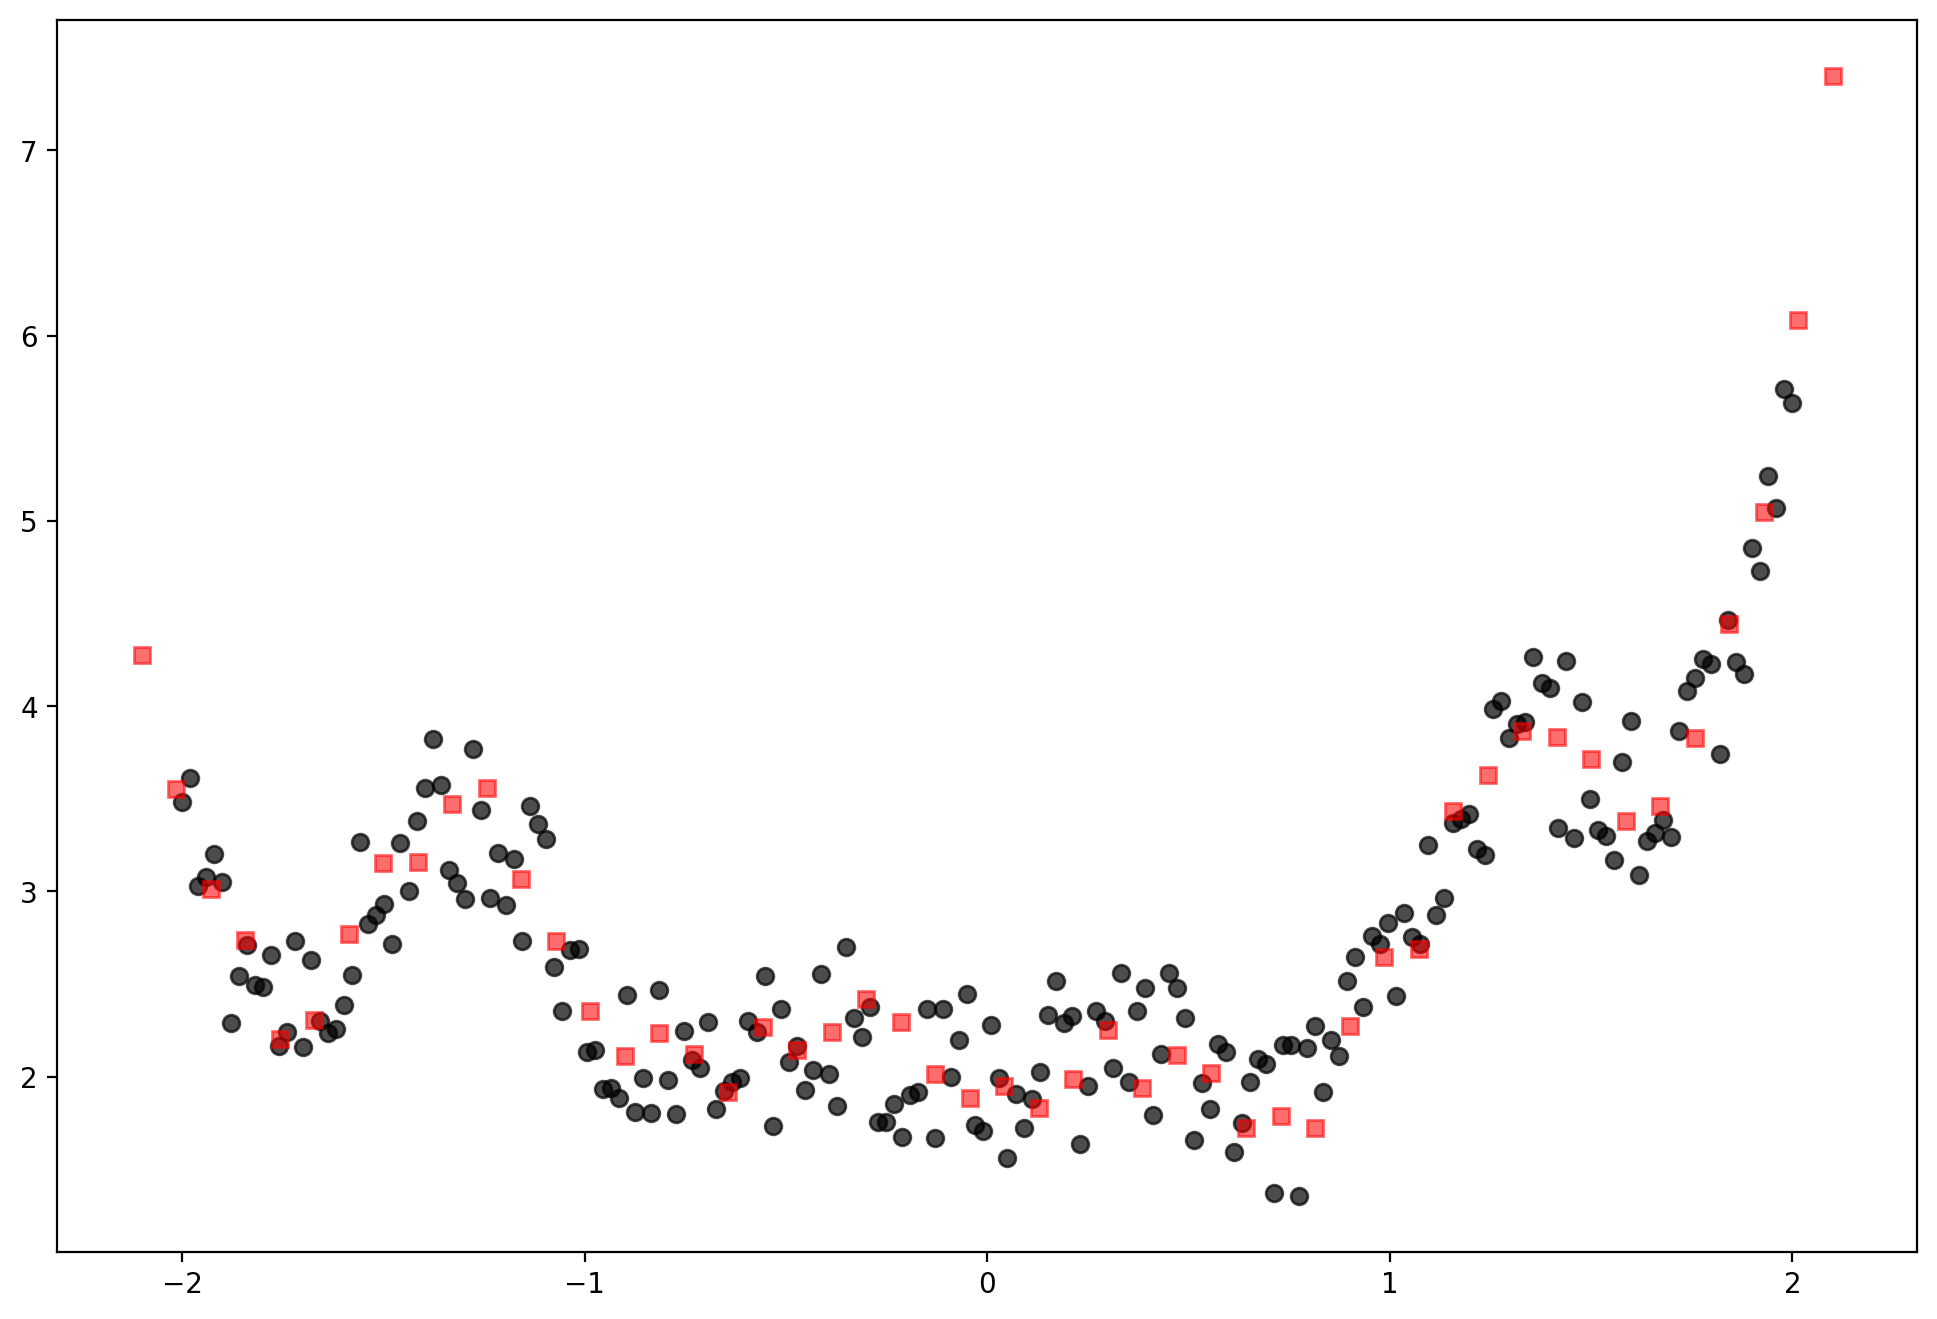

In [6]:
plt.plot(x_train,y_train,'ok', alpha = 0.7)
plt.plot(x_test,y_test,'rs', alpha=0.57)

In [7]:
features = np.array([[xval] for xval in x_train])
labels = np.array([[yval] for yval in y_train])

class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 3000
        num_hidden2 = 3000
        num_hidden3 = 3000
        num_hidden4 = 3000
        
        self.W1 = tf.Variable(tf.random.normal([1,num_hidden1], seed = 2023), name ='weight1')
        self.b1 = tf.Variable(tf.zeros([num_hidden1]), name = 'bias1')
        
        self.W2 = tf.Variable(tf.random.normal([num_hidden1,num_hidden2], seed = 2023), name ='weight2')
        self.b2 = tf.Variable(tf.zeros([num_hidden2]), name = 'bias2')
        
        self.W3 = tf.Variable(tf.random.normal([num_hidden2,num_hidden3], seed = 2023), name ='weight3')
        self.b3 = tf.Variable(tf.zeros([num_hidden3]), name = 'bias3')
        
        self.W4 = tf.Variable(tf.random.normal([num_hidden2,num_hidden3], seed = 2023), name ='weight4')
        self.b4 = tf.Variable(tf.zeros([num_hidden3]), name = 'bias4')
        
        self.W5 = tf.Variable(tf.random.normal([num_hidden2,1], seed = 2023), name ='weight5')
        self.b5 = tf.Variable(tf.zeros([1]), name = 'bias5')
    
    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)
        
        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)
        
        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.sigmoid(l3)
        
        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.sigmoid(l4)
        
        yhat = tf.matmul(h4, self.W5) + self.b5
        return yhat


In [8]:
Epochs = 2000
batch_size = 512
lr = 0.001
optimizer = tf.keras.optimizers.legacy.Adagrad(lr)
loss = tf.keras.losses.MeanSquaredError()

In [9]:
np.random.seed(20)
shuffled_Id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_Id)
shuffled_x_train = features[shuffled_Id]
shuffled_y_train = labels[shuffled_Id]

In [10]:
model = MyModel()

In [11]:
model.compile(optimizer=optimizer, loss=loss)

In [12]:
data3 = np.load('./pb3.npz')
x_train3 = data3['x_train']
y_train3 = data3['y_train']
z_train3 = data3['z_train']
target = data3['target'] # t

In [13]:
history = model.fit(shuffled_x_train, shuffled_y_train, epochs = Epochs, batch_size = batch_size, shuffle = False, verbose='auto')

Epoch 1/2000
1/1 [==============================] - 0s 424ms/step - loss: 520.9534
Epoch 2/2000
1/1 [==============================] - 0s 285ms/step - loss: 2161.2000
Epoch 3/2000
1/1 [==============================] - 0s 220ms/step - loss: 511.1803
Epoch 4/2000
1/1 [==============================] - 0s 212ms/step - loss: 394.0312
Epoch 5/2000
1/1 [==============================] - 0s 213ms/step - loss: 171.9222
Epoch 6/2000
1/1 [==============================] - 0s 225ms/step - loss: 132.6722
Epoch 7/2000
1/1 [==============================] - 0s 228ms/step - loss: 53.6544
Epoch 8/2000
1/1 [==============================] - 0s 234ms/step - loss: 39.8947
Epoch 9/2000
1/1 [==============================] - 0s 231ms/step - loss: 32.8671
Epoch 10/2000
1/1 [==============================] - 0s 233ms/step - loss: 29.3778
Epoch 11/2000
1/1 [==============================] - 0s 220ms/step - loss: 21.6216
Epoch 12/2000
1/1 [==============================] - 0s 221ms/step - loss: 4.8074
Epoch 1

1/1 [==============================] - 0s 221ms/step - loss: 0.0209
Epoch 101/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0208
Epoch 102/2000
1/1 [==============================] - 0s 235ms/step - loss: 0.0207
Epoch 103/2000
1/1 [==============================] - 0s 237ms/step - loss: 0.0206
Epoch 104/2000
1/1 [==============================] - 0s 370ms/step - loss: 0.0205
Epoch 105/2000
1/1 [==============================] - 0s 393ms/step - loss: 0.0204
Epoch 106/2000
1/1 [==============================] - 0s 340ms/step - loss: 0.0203
Epoch 107/2000
1/1 [==============================] - 0s 290ms/step - loss: 0.0202
Epoch 108/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0201
Epoch 109/2000
1/1 [==============================] - 0s 232ms/step - loss: 0.0201
Epoch 110/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0200
Epoch 111/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0199
Epoch 112/2000
1/1 

1/1 [==============================] - 0s 225ms/step - loss: 0.0159
Epoch 199/2000
1/1 [==============================] - 0s 216ms/step - loss: 0.0159
Epoch 200/2000
1/1 [==============================] - 0s 272ms/step - loss: 0.0159
Epoch 201/2000
1/1 [==============================] - 0s 230ms/step - loss: 0.0158
Epoch 202/2000
1/1 [==============================] - 0s 293ms/step - loss: 0.0158
Epoch 203/2000
1/1 [==============================] - 0s 214ms/step - loss: 0.0158
Epoch 204/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0158
Epoch 205/2000
1/1 [==============================] - 0s 232ms/step - loss: 0.0157
Epoch 206/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0157
Epoch 207/2000
1/1 [==============================] - 0s 253ms/step - loss: 0.0157
Epoch 208/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0157
Epoch 209/2000
1/1 [==============================] - 0s 217ms/step - loss: 0.0156
Epoch 210/2000
1/1 

1/1 [==============================] - 0s 221ms/step - loss: 0.0141
Epoch 297/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0140
Epoch 298/2000
1/1 [==============================] - 0s 240ms/step - loss: 0.0140
Epoch 299/2000
1/1 [==============================] - 0s 254ms/step - loss: 0.0140
Epoch 300/2000
1/1 [==============================] - 0s 260ms/step - loss: 0.0140
Epoch 301/2000
1/1 [==============================] - 0s 256ms/step - loss: 0.0140
Epoch 302/2000
1/1 [==============================] - 0s 218ms/step - loss: 0.0140
Epoch 303/2000
1/1 [==============================] - 0s 215ms/step - loss: 0.0140
Epoch 304/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0139
Epoch 305/2000
1/1 [==============================] - 0s 235ms/step - loss: 0.0139
Epoch 306/2000
1/1 [==============================] - 0s 253ms/step - loss: 0.0139
Epoch 307/2000
1/1 [==============================] - 0s 239ms/step - loss: 0.0139
Epoch 308/2000
1/1 

1/1 [==============================] - 0s 233ms/step - loss: 0.0129
Epoch 395/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0129
Epoch 396/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0129
Epoch 397/2000
1/1 [==============================] - 0s 215ms/step - loss: 0.0129
Epoch 398/2000
1/1 [==============================] - 0s 210ms/step - loss: 0.0129
Epoch 399/2000
1/1 [==============================] - 0s 213ms/step - loss: 0.0129
Epoch 400/2000
1/1 [==============================] - 0s 215ms/step - loss: 0.0129
Epoch 401/2000
1/1 [==============================] - 0s 213ms/step - loss: 0.0129
Epoch 402/2000
1/1 [==============================] - 0s 212ms/step - loss: 0.0129
Epoch 403/2000
1/1 [==============================] - 0s 205ms/step - loss: 0.0128
Epoch 404/2000
1/1 [==============================] - 0s 209ms/step - loss: 0.0128
Epoch 405/2000
1/1 [==============================] - 0s 208ms/step - loss: 0.0128
Epoch 406/2000
1/1 

1/1 [==============================] - 0s 225ms/step - loss: 0.0121
Epoch 493/2000
1/1 [==============================] - 0s 230ms/step - loss: 0.0121
Epoch 494/2000
1/1 [==============================] - 0s 236ms/step - loss: 0.0121
Epoch 495/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0121
Epoch 496/2000
1/1 [==============================] - 0s 220ms/step - loss: 0.0121
Epoch 497/2000
1/1 [==============================] - 0s 217ms/step - loss: 0.0121
Epoch 498/2000
1/1 [==============================] - 0s 250ms/step - loss: 0.0121
Epoch 499/2000
1/1 [==============================] - 0s 255ms/step - loss: 0.0121
Epoch 500/2000
1/1 [==============================] - 0s 234ms/step - loss: 0.0121
Epoch 501/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0121
Epoch 502/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0121
Epoch 503/2000
1/1 [==============================] - 0s 234ms/step - loss: 0.0121
Epoch 504/2000
1/1 

1/1 [==============================] - 0s 220ms/step - loss: 0.0116
Epoch 591/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0116
Epoch 592/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0116
Epoch 593/2000
1/1 [==============================] - 0s 213ms/step - loss: 0.0116
Epoch 594/2000
1/1 [==============================] - 0s 214ms/step - loss: 0.0115
Epoch 595/2000
1/1 [==============================] - 0s 220ms/step - loss: 0.0115
Epoch 596/2000
1/1 [==============================] - 0s 218ms/step - loss: 0.0115
Epoch 597/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0115
Epoch 598/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0115
Epoch 599/2000
1/1 [==============================] - 0s 220ms/step - loss: 0.0115
Epoch 600/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0115
Epoch 601/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0115
Epoch 602/2000
1/1 

1/1 [==============================] - 0s 226ms/step - loss: 0.0111
Epoch 689/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0111
Epoch 690/2000
1/1 [==============================] - 0s 230ms/step - loss: 0.0111
Epoch 691/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0111
Epoch 692/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0111
Epoch 693/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0111
Epoch 694/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0111
Epoch 695/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0111
Epoch 696/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0111
Epoch 697/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0111
Epoch 698/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0111
Epoch 699/2000
1/1 [==============================] - 0s 221ms/step - loss: 0.0111
Epoch 700/2000
1/1 

1/1 [==============================] - 0s 225ms/step - loss: 0.0108
Epoch 787/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0108
Epoch 788/2000
1/1 [==============================] - 0s 262ms/step - loss: 0.0108
Epoch 789/2000
1/1 [==============================] - 0s 233ms/step - loss: 0.0108
Epoch 790/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0108
Epoch 791/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0108
Epoch 792/2000
1/1 [==============================] - 0s 220ms/step - loss: 0.0107
Epoch 793/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0107
Epoch 794/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0107
Epoch 795/2000
1/1 [==============================] - 0s 254ms/step - loss: 0.0107
Epoch 796/2000
1/1 [==============================] - 0s 266ms/step - loss: 0.0107
Epoch 797/2000
1/1 [==============================] - 0s 267ms/step - loss: 0.0107
Epoch 798/2000
1/1 

1/1 [==============================] - 0s 225ms/step - loss: 0.0105
Epoch 885/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0105
Epoch 886/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0105
Epoch 887/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0105
Epoch 888/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0105
Epoch 889/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0105
Epoch 890/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0105
Epoch 891/2000
1/1 [==============================] - 0s 246ms/step - loss: 0.0105
Epoch 892/2000
1/1 [==============================] - 0s 259ms/step - loss: 0.0105
Epoch 893/2000
1/1 [==============================] - 0s 264ms/step - loss: 0.0105
Epoch 894/2000
1/1 [==============================] - 0s 245ms/step - loss: 0.0104
Epoch 895/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0104
Epoch 896/2000
1/1 

1/1 [==============================] - 0s 242ms/step - loss: 0.0102
Epoch 983/2000
1/1 [==============================] - 0s 256ms/step - loss: 0.0102
Epoch 984/2000
1/1 [==============================] - 0s 293ms/step - loss: 0.0102
Epoch 985/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0102
Epoch 986/2000
1/1 [==============================] - 0s 220ms/step - loss: 0.0102
Epoch 987/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0102
Epoch 988/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0102
Epoch 989/2000
1/1 [==============================] - 0s 230ms/step - loss: 0.0102
Epoch 990/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0102
Epoch 991/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0102
Epoch 992/2000
1/1 [==============================] - 0s 230ms/step - loss: 0.0102
Epoch 993/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0102
Epoch 994/2000
1/1 

Epoch 1080/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0100
Epoch 1081/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0100
Epoch 1082/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0100
Epoch 1083/2000
1/1 [==============================] - 0s 221ms/step - loss: 0.0100
Epoch 1084/2000
1/1 [==============================] - 0s 221ms/step - loss: 0.0100
Epoch 1085/2000
1/1 [==============================] - 0s 221ms/step - loss: 0.0100
Epoch 1086/2000
1/1 [==============================] - 0s 220ms/step - loss: 0.0100
Epoch 1087/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0100
Epoch 1088/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0100
Epoch 1089/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0100
Epoch 1090/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0100
Epoch 1091/2000
1/1 [==============================] - 0s 230ms/step - loss:

1/1 [==============================] - 0s 253ms/step - loss: 0.0098
Epoch 1178/2000
1/1 [==============================] - 0s 230ms/step - loss: 0.0098
Epoch 1179/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0098
Epoch 1180/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0098
Epoch 1181/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0098
Epoch 1182/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0098
Epoch 1183/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0098
Epoch 1184/2000
1/1 [==============================] - 0s 215ms/step - loss: 0.0098
Epoch 1185/2000
1/1 [==============================] - 0s 215ms/step - loss: 0.0098
Epoch 1186/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0098
Epoch 1187/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0098
Epoch 1188/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0098
Epoch 11

1/1 [==============================] - 0s 219ms/step - loss: 0.0097
Epoch 1275/2000
1/1 [==============================] - 0s 218ms/step - loss: 0.0097
Epoch 1276/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0097
Epoch 1277/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0097
Epoch 1278/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0097
Epoch 1279/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0097
Epoch 1280/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0097
Epoch 1281/2000
1/1 [==============================] - 0s 259ms/step - loss: 0.0097
Epoch 1282/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0096
Epoch 1283/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0096
Epoch 1284/2000
1/1 [==============================] - 0s 217ms/step - loss: 0.0096
Epoch 1285/2000
1/1 [==============================] - 0s 235ms/step - loss: 0.0096
Epoch 12

1/1 [==============================] - 0s 227ms/step - loss: 0.0095
Epoch 1372/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0095
Epoch 1373/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0095
Epoch 1374/2000
1/1 [==============================] - 0s 233ms/step - loss: 0.0095
Epoch 1375/2000
1/1 [==============================] - 0s 240ms/step - loss: 0.0095
Epoch 1376/2000
1/1 [==============================] - 0s 248ms/step - loss: 0.0095
Epoch 1377/2000
1/1 [==============================] - 0s 237ms/step - loss: 0.0095
Epoch 1378/2000
1/1 [==============================] - 0s 230ms/step - loss: 0.0095
Epoch 1379/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0095
Epoch 1380/2000
1/1 [==============================] - 0s 241ms/step - loss: 0.0095
Epoch 1381/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0095
Epoch 1382/2000
1/1 [==============================] - 0s 263ms/step - loss: 0.0095
Epoch 13

1/1 [==============================] - 0s 223ms/step - loss: 0.0094
Epoch 1469/2000
1/1 [==============================] - 0s 237ms/step - loss: 0.0094
Epoch 1470/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0094
Epoch 1471/2000
1/1 [==============================] - 0s 246ms/step - loss: 0.0094
Epoch 1472/2000
1/1 [==============================] - 0s 248ms/step - loss: 0.0094
Epoch 1473/2000
1/1 [==============================] - 0s 258ms/step - loss: 0.0094
Epoch 1474/2000
1/1 [==============================] - 0s 274ms/step - loss: 0.0094
Epoch 1475/2000
1/1 [==============================] - 0s 288ms/step - loss: 0.0094
Epoch 1476/2000
1/1 [==============================] - 0s 291ms/step - loss: 0.0094
Epoch 1477/2000
1/1 [==============================] - 0s 260ms/step - loss: 0.0094
Epoch 1478/2000
1/1 [==============================] - 0s 256ms/step - loss: 0.0094
Epoch 1479/2000
1/1 [==============================] - 0s 262ms/step - loss: 0.0094
Epoch 14

1/1 [==============================] - 0s 218ms/step - loss: 0.0092
Epoch 1566/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0092
Epoch 1567/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0092
Epoch 1568/2000
1/1 [==============================] - 0s 221ms/step - loss: 0.0092
Epoch 1569/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0092
Epoch 1570/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0092
Epoch 1571/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0092
Epoch 1572/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0092
Epoch 1573/2000
1/1 [==============================] - 0s 212ms/step - loss: 0.0092
Epoch 1574/2000
1/1 [==============================] - 0s 219ms/step - loss: 0.0092
Epoch 1575/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0092
Epoch 1576/2000
1/1 [==============================] - 0s 222ms/step - loss: 0.0092
Epoch 15

1/1 [==============================] - 0s 239ms/step - loss: 0.0091
Epoch 1663/2000
1/1 [==============================] - 0s 228ms/step - loss: 0.0091
Epoch 1664/2000
1/1 [==============================] - 0s 234ms/step - loss: 0.0091
Epoch 1665/2000
1/1 [==============================] - 0s 234ms/step - loss: 0.0091
Epoch 1666/2000
1/1 [==============================] - 0s 233ms/step - loss: 0.0091
Epoch 1667/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0091
Epoch 1668/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0091
Epoch 1669/2000
1/1 [==============================] - 0s 217ms/step - loss: 0.0091
Epoch 1670/2000
1/1 [==============================] - 0s 234ms/step - loss: 0.0091
Epoch 1671/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0091
Epoch 1672/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0091
Epoch 1673/2000
1/1 [==============================] - 0s 223ms/step - loss: 0.0091
Epoch 16

1/1 [==============================] - 0s 233ms/step - loss: 0.0090
Epoch 1760/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0090
Epoch 1761/2000
1/1 [==============================] - 0s 221ms/step - loss: 0.0090
Epoch 1762/2000
1/1 [==============================] - 0s 221ms/step - loss: 0.0090
Epoch 1763/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0090
Epoch 1764/2000
1/1 [==============================] - 0s 238ms/step - loss: 0.0090
Epoch 1765/2000
1/1 [==============================] - 0s 235ms/step - loss: 0.0090
Epoch 1766/2000
1/1 [==============================] - 0s 244ms/step - loss: 0.0090
Epoch 1767/2000
1/1 [==============================] - 0s 244ms/step - loss: 0.0090
Epoch 1768/2000
1/1 [==============================] - 0s 239ms/step - loss: 0.0090
Epoch 1769/2000
1/1 [==============================] - 0s 232ms/step - loss: 0.0090
Epoch 1770/2000
1/1 [==============================] - 0s 214ms/step - loss: 0.0090
Epoch 17

1/1 [==============================] - 0s 271ms/step - loss: 0.0089
Epoch 1857/2000
1/1 [==============================] - 0s 287ms/step - loss: 0.0089
Epoch 1858/2000
1/1 [==============================] - 0s 257ms/step - loss: 0.0089
Epoch 1859/2000
1/1 [==============================] - 0s 236ms/step - loss: 0.0089
Epoch 1860/2000
1/1 [==============================] - 0s 273ms/step - loss: 0.0089
Epoch 1861/2000
1/1 [==============================] - 0s 250ms/step - loss: 0.0089
Epoch 1862/2000
1/1 [==============================] - 0s 258ms/step - loss: 0.0089
Epoch 1863/2000
1/1 [==============================] - 0s 265ms/step - loss: 0.0089
Epoch 1864/2000
1/1 [==============================] - 0s 238ms/step - loss: 0.0089
Epoch 1865/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0089
Epoch 1866/2000
1/1 [==============================] - 0s 226ms/step - loss: 0.0089
Epoch 1867/2000
1/1 [==============================] - 0s 234ms/step - loss: 0.0089
Epoch 18

1/1 [==============================] - 0s 257ms/step - loss: 0.0088
Epoch 1954/2000
1/1 [==============================] - 0s 261ms/step - loss: 0.0088
Epoch 1955/2000
1/1 [==============================] - 0s 240ms/step - loss: 0.0088
Epoch 1956/2000
1/1 [==============================] - 0s 227ms/step - loss: 0.0088
Epoch 1957/2000
1/1 [==============================] - 0s 231ms/step - loss: 0.0088
Epoch 1958/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0088
Epoch 1959/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0088
Epoch 1960/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.0088
Epoch 1961/2000
1/1 [==============================] - 0s 251ms/step - loss: 0.0088
Epoch 1962/2000
1/1 [==============================] - 0s 246ms/step - loss: 0.0088
Epoch 1963/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.0088
Epoch 1964/2000
1/1 [==============================] - 0s 224ms/step - loss: 0.0088
Epoch 19

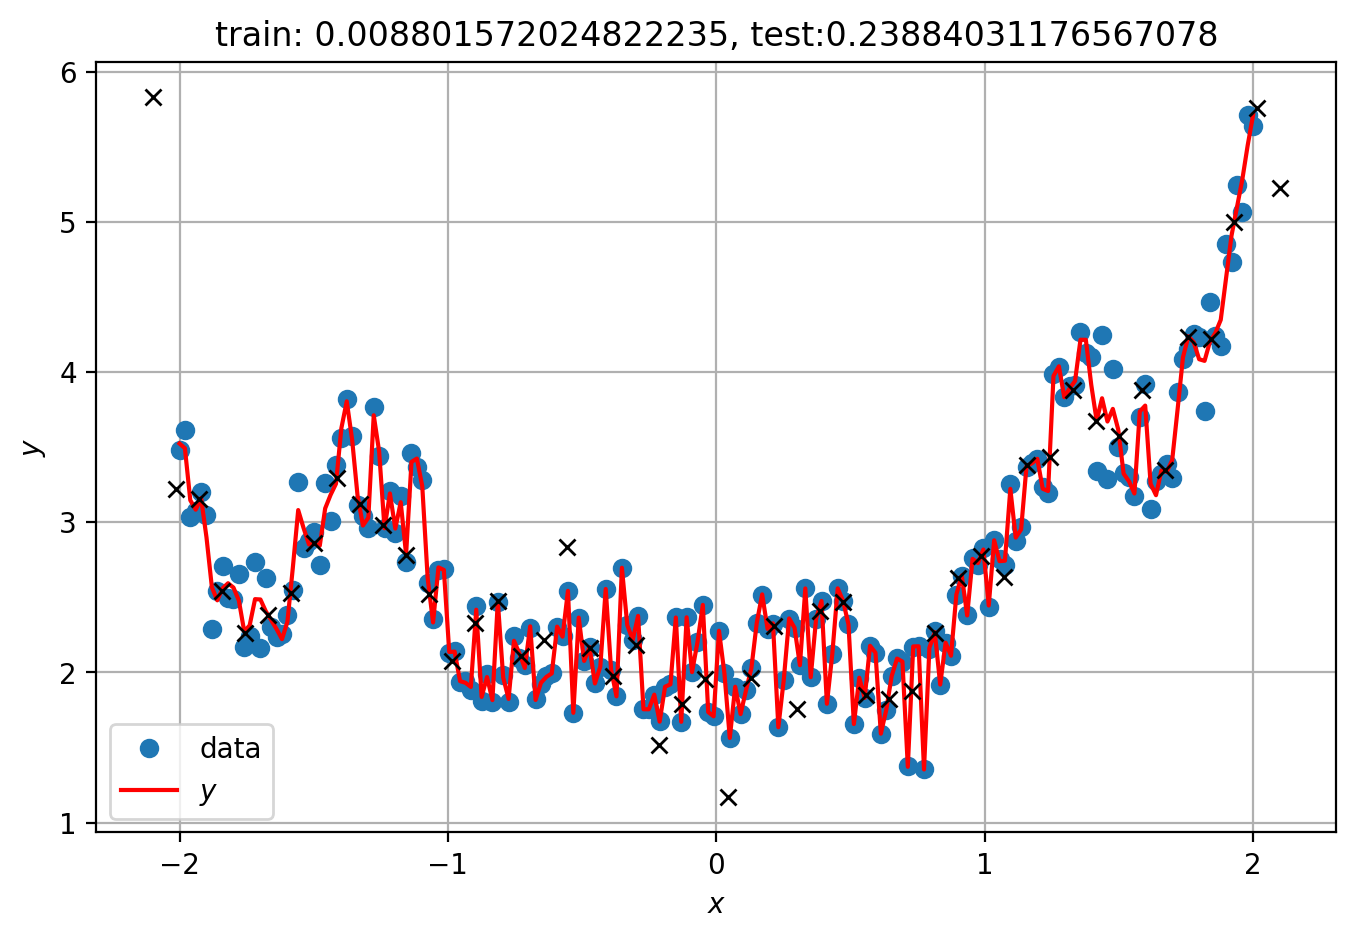

In [14]:
yhat_= model(features)
yhat2 = model(x_test.reshape(-1,1))
loss2 = loss(y_test.reshape(-1,1),yhat2.numpy())
ax = plt.subplots(figsize=(8,5))
plt.plot(x_train, y_train, 'o')
plt.plot(features, yhat_.numpy(), 'r')
plt.plot(x_test.reshape(-1,1), yhat2.numpy(), 'kx')

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('train: {}, test:{}'.format(history.history['loss'][-1],loss2))
plt.legend(['data', '$y$'])